# Section one

In [1]:
import pandas as pd
from datetime import datetime


table_list = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
table = table_list[0] 


In [2]:
(table["Symbol"] == "GOOGL").any

<bound method NDFrame._add_numeric_operations.<locals>.any of 0      False
1      False
2      False
3      False
4      False
       ...  
498    False
499    False
500    False
501    False
502    False
Name: Symbol, Length: 503, dtype: bool>

## Yahoo finance

In [3]:
import yfinance as yf

data = yf.download(tickers=list(table["Symbol"].values),start="2010-01-04", interval="1d", group_by = "ticker")

[*********************100%%**********************]  503 of 503 completed


2 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-04 -> 2023-12-17)')


In [4]:
data

NTAP                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2010-01-04  34.590000  34.869999  34.000000  34.189999  26.354303  5320100   
2010-01-05  34.099998  34.349998  33.380001  33.590000  25.891821  7933900   
2010-01-06  33.470001  33.990002  33.099998  33.349998  25.706821  5193900   
2010-01-07  33.240002  33.529999  32.990002  33.270000  25.645153  5373000   
2010-01-08  33.119999  33.590000  32.779999  33.540001  25.853279  4718400   
...               ...        ...        ...        ...        ...      ...   
2023-12-11  89.500000  90.599998  89.220001  89.750000  89.750000  2211600   
2023-12-12  90.000000  90.139999  88.000000  88.199997  88.199997  2131700   
2023-12-13  88.250000  89.690002  87.769997  89.540001  89.540001  3973700   
2023-12-14  89.790001  90.199997  88.510002  89.209999  89.209999  3155400   
2023-12-15  88.959999  89.150002  87.970001  88.919998  88.919998  5789300   

                  EXPD                                      ...         PXD  \
                  Open        High         Low       Close  ...         Low   
Date                                                        ...               
2010-01-04   35.090000   35.180000   34.840000   35.080002  ...   49.380001   
2010-01-05   34.990002   35.340000   34.869999   35.320000  ...   50.790001   
2010-01-06   35.169998   35.349998   34.430000   34.500000  ...   50.560001   
2010-01-07   34.400002   34.529999   34.009998   34.290001  ...   50.290001   
2010-01-08   34.290001   35.080002   34.290001   34.650002  ...   51.380001   
...                ...         ...         ...         ...  ...         ...   
2023-12-11  119.980003  120.709999  118.690002  120.379997  ...  221.539993   
2023-12-12  120.680000  120.959999  119.970001  120.519997  ...  219.279999   
2023-12-13  120.620003  122.410004  119.629997  122.290001  ...  219.660004   
2023-12-14  123.500000  124.220001  122.760002  123.519997  ...  224.119995   
2023-12-15  123.000000  125.089996  122.489998  124.449997  ...  225.610001   

                                                  GOOGL              \
                 Close   Adj Close   Volume        Open        High   
Date                                                                  
2010-01-04   50.980000   39.753571  1524100   15.689439   15.753504   
2010-01-05   51.000000   39.769169  1666100   15.695195   15.711712   
2010-01-06   51.889999   40.463173  2130300   15.662162   15.662162   
2010-01-07   52.349998   40.821873  1491400   15.250250   15.265265   
2010-01-08   53.250000   41.523678  1374800   14.814815   15.096346   
...                ...         ...      ...         ...         ...   
2023-12-11  223.429993  223.429993  2006100  132.380005  133.339996   
2023-12-12  220.279999  220.279999  2462400  131.809998  133.000000   
2023-12-13  222.619995  222.619995  2861800  133.380005  133.500000   
2023-12-14  228.449997  228.449997  2835800  133.380005  133.720001   
2023-12-15  227.149994  227.149994  3951500  131.619995  133.509995   

                                                           
                   Low       Close   Adj Close     Volume  
Date                                                       
2010-01-04   15.621622   15.684434   15.684434   78169752  
2010-01-05   15.554054   15.615365   15.615365  120067812  
2010-01-06   15.174174   15.221722   15.221722  158988852  
2010-01-07   14.831081   14.867367   14.867367  256315428  
2010-01-08   14.742492   15.065566   15.065566  188783028  
...                ...         ...         ...        ...  
2023-12-11  131.360001  133.289993  133.289993   31138000  
2023-12-12  131.259995  132.520004  132.520004   29032800  
2023-12-13  131.570007  132.570007  132.570007   30104800  
2023-12-14  129.690002  131.940002  131.940002   38722400  
2023-12-15  131.179993  132.600006  132.60

# Section two

In [5]:
nan_counts_per_row = sum(data.isna().sum(axis=1))
print(nan_counts_per_row)


521634


In [6]:

for column in data.columns:
    data[column].iloc[:100] = data[column].iloc[:100].fillna(method='ffill')
    data[column].iloc[100:] = data[column].iloc[100:].fillna(data[column].iloc[100:].mean())

    if data[column].isna().sum() !=0 and data[column].isna().sum() == len( data[column]):
        data[column] = data[column].fillna(0)
    if data[column].isna().sum() !=0 and data[column].isna().sum() != len( data[column]):
        data[column] = data[column].fillna(data[column].mean())
    elif data[column].isna().sum() !=0:
        columns = column
        print(data[column])
        print(data[column].isna().sum())
        

        


C:\Users\11\AppData\Local\Temp\ipykernel_18092\3192078431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].iloc[:100] = data[column].iloc[:100].fillna(method='ffill')
C:\Users\11\AppData\Local\Temp\ipykernel_18092\3192078431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].iloc[100:] = data[column].iloc[100:].fillna(data[column].iloc[100:].mean())


In [7]:

nan_counts_per_row = sum(data.isna().sum(axis=1))
print(nan_counts_per_row)


0


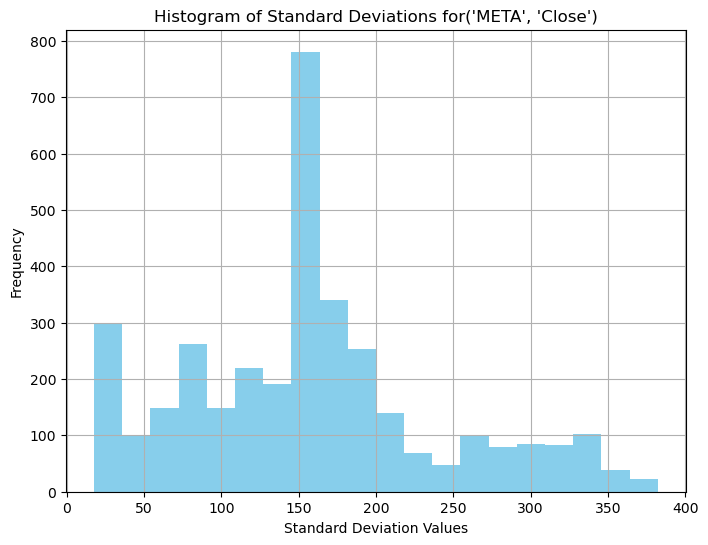

In [8]:
import matplotlib.pyplot as plt
columns = ('META', 'Close')

plt.figure(figsize=(8, 6))
plt.hist(data[columns], bins=20, color='skyblue')  
plt.xlabel('Standard Deviation Values')
plt.ylabel('Frequency')
plt.title(f'Histogram of Standard Deviations for{columns}')
plt.grid(True)
plt.show()


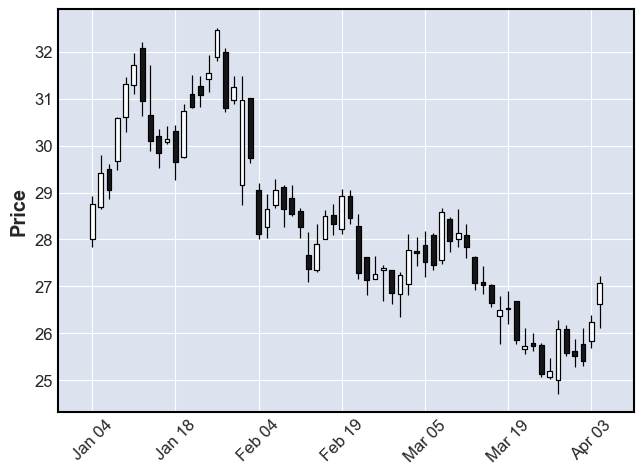

In [9]:

import mplfinance as mpf
data.index = pd.to_datetime(data.index)
sliced_data = data[("META")].loc[pd.Timestamp("2013-01-04"):pd.Timestamp("2013-04-04")]
mpf.plot(sliced_data,type='candle')

# Section 3

In [10]:
data = data[["AAPL", "MSFT", "AMZN", "META", "GOOGL"]]


In [11]:
for column in data.columns:
    data[column].iloc[:1000] = data[column].iloc[:1000].fillna(method='ffill')
    data[column].iloc[100:] = data[column].iloc[100:].fillna(data[column].iloc[100:].mean())

    if data[column].isna().sum() !=0 and data[column].isna().sum() == len( data[column]):
        data[column] = data[column].fillna(0)
    if data[column].isna().sum() !=0 and data[column].isna().sum() != len( data[column]):
        data[column] = data[column].fillna(data[column].mean())
    elif data[column].isna().sum() !=0:
        columns = column
        print(data[column])
        print(data[column].isna().sum())
        


C:\Users\11\AppData\Local\Temp\ipykernel_18092\4243238996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].iloc[:1000] = data[column].iloc[:1000].fillna(method='ffill')
C:\Users\11\AppData\Local\Temp\ipykernel_18092\4243238996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].iloc[100:] = data[column].iloc[100:].fillna(data[column].iloc[100:].mean())


In [12]:
data

AAPL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2010-01-04    7.622500    7.660714    7.585000    7.643214    6.478998   
2010-01-05    7.664286    7.699643    7.616071    7.656429    6.490199   
2010-01-06    7.656429    7.686786    7.526786    7.534643    6.386963   
2010-01-07    7.562500    7.571429    7.466071    7.520714    6.375157   
2010-01-08    7.510714    7.571429    7.466429    7.570714    6.417541   
...                ...         ...         ...         ...         ...   
2023-12-11  193.110001  193.490005  191.419998  193.179993  193.179993   
2023-12-12  193.080002  194.720001  191.720001  194.710007  194.710007   
2023-12-13  195.089996  198.000000  194.850006  197.960007  197.960007   
2023-12-14  198.020004  199.619995  196.160004  198.110001  198.110001   
2023-12-15  197.529999  198.399994  197.000000  197.570007  197.570007   

                             MSFT                                      ...  \
               Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2010-01-04  493729600   30.620001   31.100000   30.590000   30.950001  ...   
2010-01-05  601904800   30.850000   31.100000   30.639999   30.959999  ...   
2010-01-06  552160000   30.879999   31.080000   30.520000   30.770000  ...   
2010-01-07  477131200   30.629999   30.700001   30.190001   30.450001  ...   
2010-01-08  447610800   30.280001   30.879999   30.240000   30.660000  ...   
...               ...         ...         ...         ...         ...  ...   
2023-12-11   60943700  368.480011  371.600006  366.100006  371.299988  ...   
2023-12-12   52696900  370.850006  374.420013  370.459991  374.380005  ...   
2023-12-13   70404200  376.019989  377.640015  370.769989  374.369995  ...   
2023-12-14   66831600  373.309998  373.760010  364.130005  365.929993  ...   
2023-12-15  128256700  366.850006  372.399994  366.279999  370.730011  ...   

                  META                                             GOOGL  \
                   Low       Close   Adj Close        Volume        Open   
Date                                                                       
2010-01-04  155.038823  157.090518  157.090518  3.065463e+07   15.689439   
2010-01-05  155.038823  157.090518  157.090518  3.065463e+07   15.695195   
2010-01-06  155.038823  157.090518  157.090518  3.065463e+07   15.662162   
2010-01-07  155.038823  157.090518  157.090518  3.065463e+07   15.250250   
2010-01-08  155.038823  157.090518  157.090518  3.065463e+07   14.814815   
...                ...         ...         ...           ...         ...   
2023-12-11  320.000000  325.279999  325.279999  2.580250e+07  132.380005   
2023-12-12  324.559998  334.220001  334.220001  1.848550e+07  131.809998   
2023-12-13  332.640015  334.739990  334.739990  1.635330e+07  133.380005   
2023-12-14  328.640015  333.170013  333.170013  1.960730e+07  133.380005   
2023-12-15  331.220001  334.920013  334.920013  3.000160e+07  131.619995   

                                                                       
                  High         Low       Close   Adj Close     Volume  
Date                                                                   
2010-01-04   15.753504   15.621622   15.684434   15.684434   78169752  
2010-01-05   15.711712   15.554054   15.615365   15.615365  120067812  
2010-01-06   15.662162   15.174174   15.221722   15.221722  158988852  
2010-01-07   15.265265   14.831081   14.867367   14.867367  256315428  
2010-01-08   15.096346   14.742492   15.065566   15.065566  188783028  
...                ...         ...         ...         ...        ...  
2023-12-11  133.339996  131.360001  133.289993  133.289993   31138000  
2023-12-12  133.000000  131.259995  132.520004  132.520004   29032800  
2023-12-13  133.500000  131.570

In [13]:
from sklearn.model_selection import TimeSeriesSplit
cv_n_splits = 5
tss = TimeSeriesSplit( n_splits=cv_n_splits )

In [14]:
data

AAPL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2010-01-04    7.622500    7.660714    7.585000    7.643214    6.478998   
2010-01-05    7.664286    7.699643    7.616071    7.656429    6.490199   
2010-01-06    7.656429    7.686786    7.526786    7.534643    6.386963   
2010-01-07    7.562500    7.571429    7.466071    7.520714    6.375157   
2010-01-08    7.510714    7.571429    7.466429    7.570714    6.417541   
...                ...         ...         ...         ...         ...   
2023-12-11  193.110001  193.490005  191.419998  193.179993  193.179993   
2023-12-12  193.080002  194.720001  191.720001  194.710007  194.710007   
2023-12-13  195.089996  198.000000  194.850006  197.960007  197.960007   
2023-12-14  198.020004  199.619995  196.160004  198.110001  198.110001   
2023-12-15  197.529999  198.399994  197.000000  197.570007  197.570007   

                             MSFT                                      ...  \
               Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2010-01-04  493729600   30.620001   31.100000   30.590000   30.950001  ...   
2010-01-05  601904800   30.850000   31.100000   30.639999   30.959999  ...   
2010-01-06  552160000   30.879999   31.080000   30.520000   30.770000  ...   
2010-01-07  477131200   30.629999   30.700001   30.190001   30.450001  ...   
2010-01-08  447610800   30.280001   30.879999   30.240000   30.660000  ...   
...               ...         ...         ...         ...         ...  ...   
2023-12-11   60943700  368.480011  371.600006  366.100006  371.299988  ...   
2023-12-12   52696900  370.850006  374.420013  370.459991  374.380005  ...   
2023-12-13   70404200  376.019989  377.640015  370.769989  374.369995  ...   
2023-12-14   66831600  373.309998  373.760010  364.130005  365.929993  ...   
2023-12-15  128256700  366.850006  372.399994  366.279999  370.730011  ...   

                  META                                             GOOGL  \
                   Low       Close   Adj Close        Volume        Open   
Date                                                                       
2010-01-04  155.038823  157.090518  157.090518  3.065463e+07   15.689439   
2010-01-05  155.038823  157.090518  157.090518  3.065463e+07   15.695195   
2010-01-06  155.038823  157.090518  157.090518  3.065463e+07   15.662162   
2010-01-07  155.038823  157.090518  157.090518  3.065463e+07   15.250250   
2010-01-08  155.038823  157.090518  157.090518  3.065463e+07   14.814815   
...                ...         ...         ...           ...         ...   
2023-12-11  320.000000  325.279999  325.279999  2.580250e+07  132.380005   
2023-12-12  324.559998  334.220001  334.220001  1.848550e+07  131.809998   
2023-12-13  332.640015  334.739990  334.739990  1.635330e+07  133.380005   
2023-12-14  328.640015  333.170013  333.170013  1.960730e+07  133.380005   
2023-12-15  331.220001  334.920013  334.920013  3.000160e+07  131.619995   

                                                                       
                  High         Low       Close   Adj Close     Volume  
Date                                                                   
2010-01-04   15.753504   15.621622   15.684434   15.684434   78169752  
2010-01-05   15.711712   15.554054   15.615365   15.615365  120067812  
2010-01-06   15.662162   15.174174   15.221722   15.221722  158988852  
2010-01-07   15.265265   14.831081   14.867367   14.867367  256315428  
2010-01-08   15.096346   14.742492   15.065566   15.065566  188783028  
...                ...         ...         ...         ...        ...  
2023-12-11  133.339996  131.360001  133.289993  133.289993   31138000  
2023-12-12  133.000000  131.259995  132.520004  132.520004   29032800  
2023-12-13  133.500000  131.570

In [15]:
close_columns = [col for col in data.columns if 'Close' in col]
dates = data.index
close_values = data[close_columns]
close_values

,AAPL,MSFT,AMZN,META,GOOGL
,Close,Close,Close,Close,Close
Date,,,,,
2010-01-04,7.643214,30.950001,6.695000,157.090518,15.684434
2010-01-05,7.656429,30.959999,6.734500,157.090518,15.615365
2010-01-06,7.534643,30.770000,6.612500,157.090518,15.221722
2010-01-07,7.520714,30.450001,6.500000,157.090518,14.867367
2010-01-08,7.570714,30.660000,6.676000,157.090518,15.065566
...,...,...,...,...,...
2023-12-11,193.179993,371.299988,145.889999,325.279999,133.289993
2023-12-12,194.710007,374.380005,147.479996,334.220001,132.520004


# Section 4 & 5

In [16]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sigmoid(out) 
        return out


In [17]:
import torch
import torch.nn as nn

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.gru(x, h0)
        out = self.sigmoid(out[:, -1, :])  
        return out


In [18]:
import torch
import torch.nn as nn

class BiLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(BiLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, 1)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


In [19]:
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = x.squeeze(-1)
        x = self.fc1(x)
        x = self.sigmoid(x)
        return x

In [20]:
class CNN1D(nn.Module):
    def __init__(self, input_channels, output_channels, kernel_size, stride=1):
        super(CNN1D, self).__init__()
        self.conv1d = nn.Conv1d(in_channels=input_channels, out_channels=output_channels, kernel_size=kernel_size, stride=stride)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(output_channels, 1) 
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):

        x = self.conv1d(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1) 
        x = self.fc(x)
        x = self.sigmoid(x)
        return x


In [21]:
import torch.nn as nn
import torch

class ConvLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, kernel_size=1):
        super(ConvLSTM, self).__init__()
        self.conv = nn.Conv1d(input_size,1,kernel_size)
        self.bn = nn.BatchNorm1d(1)
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(1, hidden_size, 1, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)

        x = self.conv(x)
        x = self.bn(x)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        out = self.sigmoid(out)
        return out

In [22]:
import numpy as np

def get_data(data, window_size = 10):
    x_data = []
    y_data = []


    for index, name in enumerate(["AAPL", "MSFT", "AMZN", "META", "GOOGL"]):
        x_time_series = []
        y_time_series = []
        for i in range(window_size, len(data[name])):
            x_time_series.append( data[name].iloc[i-window_size:i].values )
            y_time_series.append( data[name].iloc[i].values )

        x_time_series = np.array(x_time_series)
        y_time_series = np.array(y_time_series)

        x_data.append( x_time_series[(31-window_size): ] )
        y_data.append( y_time_series[(31-window_size) : ] )

    return x_data, y_data


In [39]:
import random
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import copy



def train_model(data, model,normalize=False):
    tss = TimeSeriesSplit(n_splits=5)
    results = {}
    number_of_runs = 0
    x_data, y_data = get_data(data, window_size = 10)
    copied_model = copy.deepcopy(model)



    for ticker_index, ticker_name in enumerate(["AAPL", "MSFT", "AMZN", "META", "GOOGL"]):
        loss_results = {'MSE': [], 'MAPE': [], 'MAE': []}
        model = copied_model

        if len(y_data[ticker_index]) != len(x_data[ticker_index]):
            raise KeyError

        # Time Series Split
        for j, (train_index, test_index) in enumerate(tss.split(x_data[ticker_index])):

                for new_seed in range(5):  torch.manual_seed(new_seed);
                number_of_runs += 1
                x_train= x_data[ticker_index][train_index]
                x_test = x_data[ticker_index][test_index]

                y_train= y_data[ticker_index][train_index]
                y_test = y_data[ticker_index][test_index]

                if normalize:

                    scaler = MinMaxScaler()
                    normalized_test_data = y_train.copy()
                    normalized_test_data = scaler.fit_transform(y_train)
                    y_train = normalized_test_data

                    normalized_test_data = y_test.copy()
                    normalized_test_data = scaler.transform(y_test)
                    y_test = normalized_test_data



                x_train_tensor = torch.from_numpy(x_train).float()
                y_train_tensor = torch.from_numpy(y_train).float()

                criterion = nn.MSELoss()
                optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
                
                model.train()
                optimizer.zero_grad()
                outputs = model(x_train_tensor)
                loss = criterion(outputs, y_train_tensor)
                loss.backward()
                optimizer.step()

                with torch.no_grad():
                    model.eval()
                    test_predictions = model(torch.from_numpy(x_test).float())
                    test_predictions = test_predictions.numpy()

                    mse = mean_squared_error(y_test, test_predictions)
                    mae = mean_absolute_error(y_test, test_predictions)
                    mape = mean_absolute_percentage_error(y_test, test_predictions)

                    loss_results['MSE'].append(mse)
                    loss_results['MAE'].append(mae)
                    loss_results['MAPE'].append(mape)
                    results[ticker_name] = loss_results
    return results


In [40]:
import matplotlib.pyplot as plt

def plot_losses(results,model_name):
    num_tickers = len(results)
    num_params = len(list(results.values())[0])  # Assuming all tickers have the same loss parameters

    fig, axes = plt.subplots(num_tickers, num_params, figsize=(10, 14))

    for i, (ticker, loss_params) in enumerate(results.items()):
        for j, (loss_type, values) in enumerate(loss_params.items()):
            if num_tickers == 1:  # Single ticker
                ax = axes[j]
            else:
                ax = axes[i, j]
            ax.plot(values)
            ax.set_title(f'{loss_type} for {ticker} With {model_name}')
            ax.set_xlabel('Iteration')
            ax.set_ylabel('Loss Value')

    plt.tight_layout()


    plt.show()




In [41]:
epoch = 10

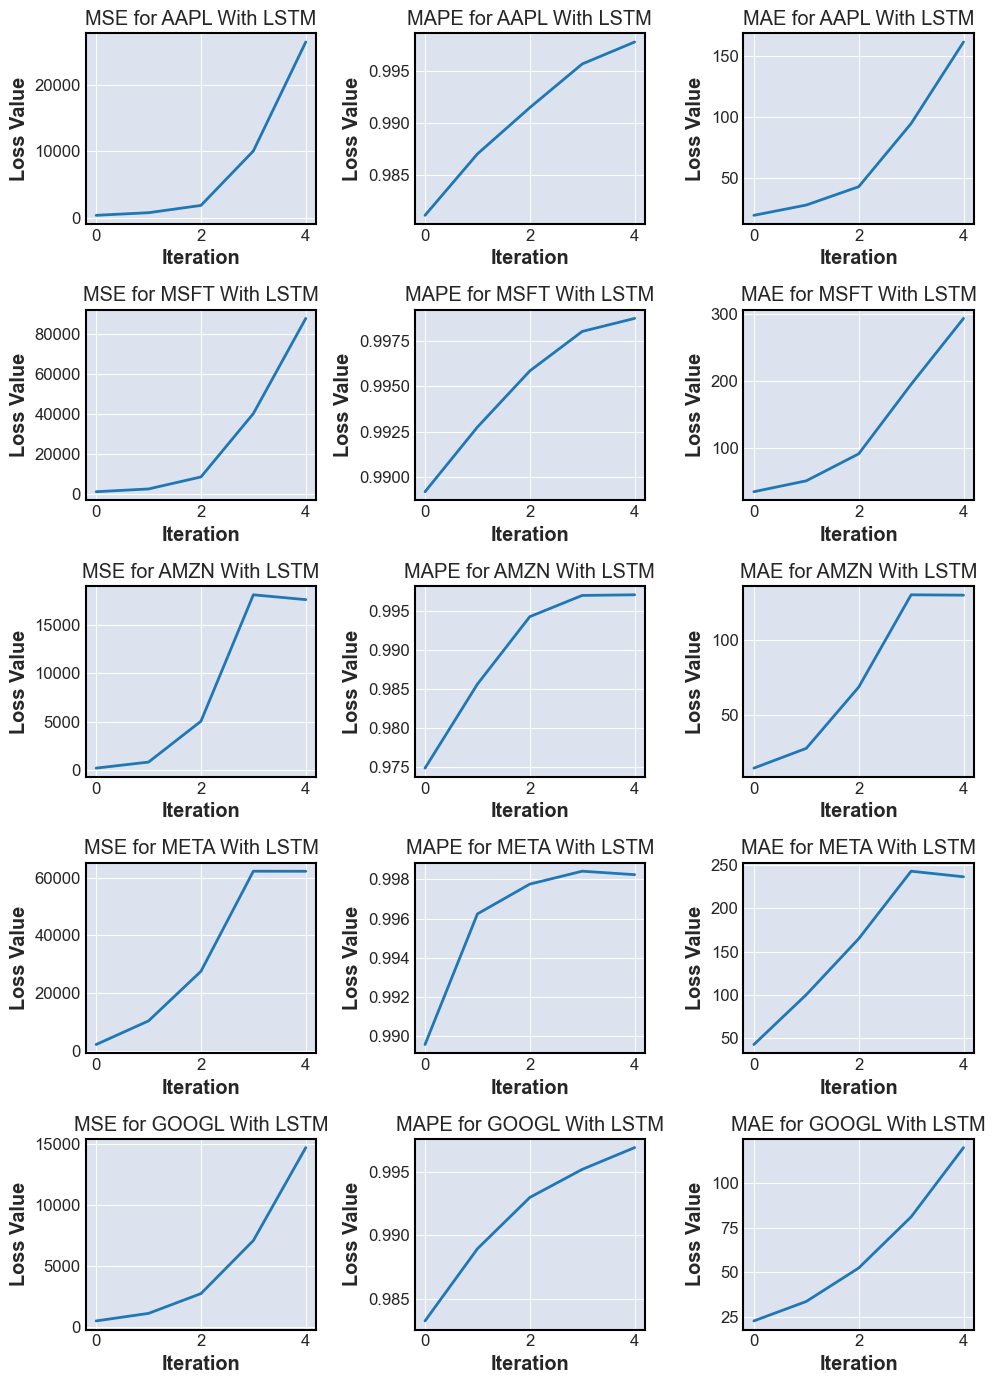

In [42]:
model = LSTMModel(1,1,1)
result = train_model(close_values,model)
plot_losses(result,"LSTM")

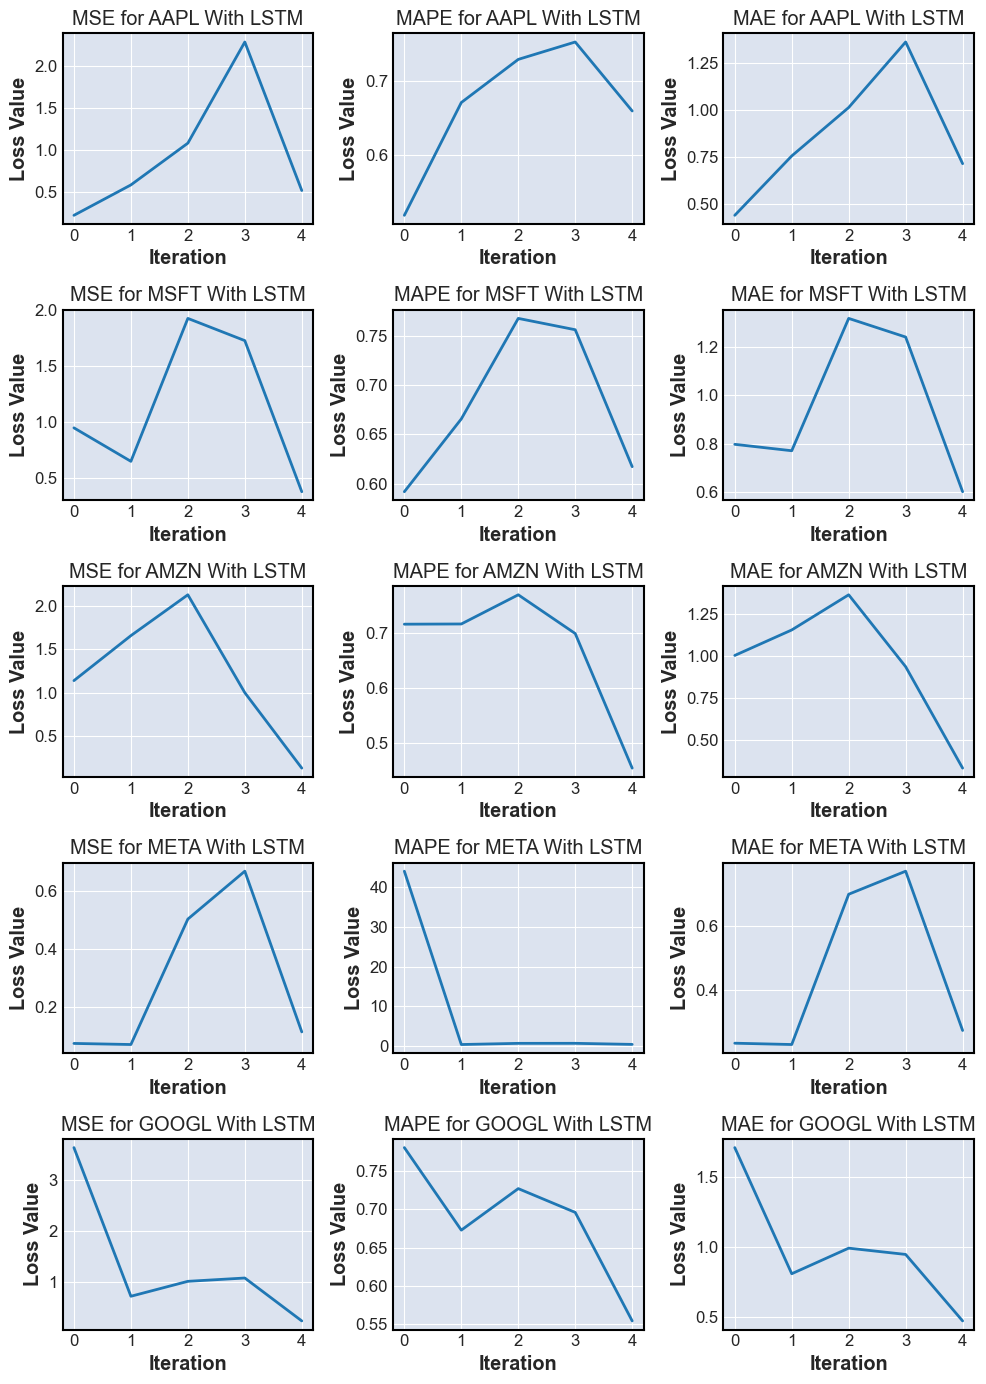

In [43]:
model = LSTMModel(1,1,1)
result = train_model(close_values,model,normalize=True)
plot_losses(result,"LSTM")

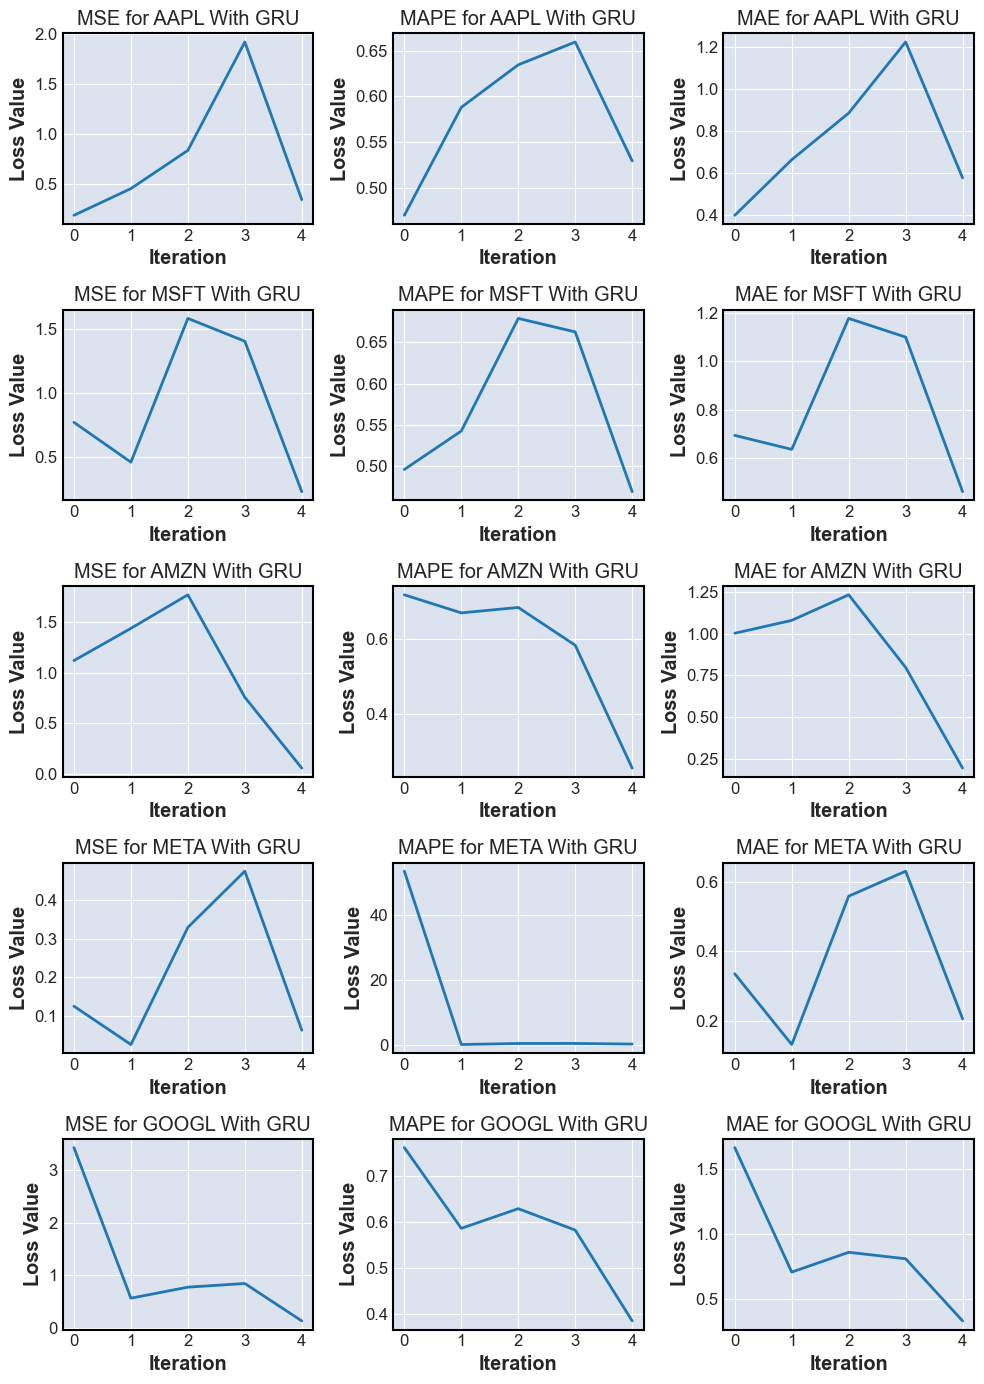

In [44]:
model = GRUModel(1,1,1)
result = train_model(close_values,model,normalize=True)
plot_losses(result,"GRU")

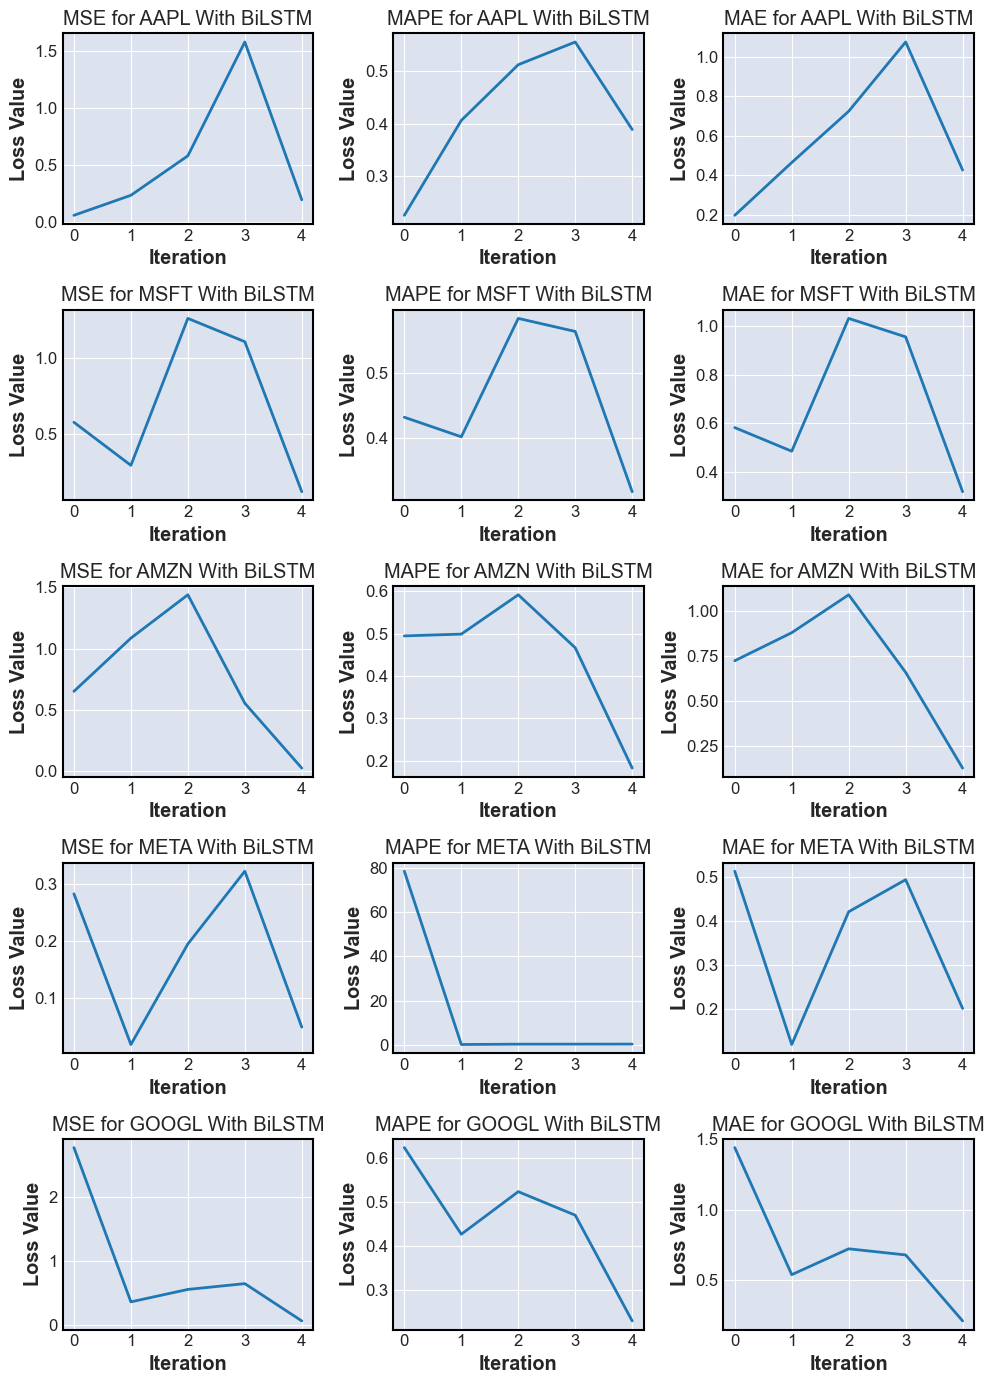

In [45]:
model = BiLSTMModel(1,1,1)
result = train_model(close_values,model,normalize=True)
plot_losses(result,"BiLSTM")

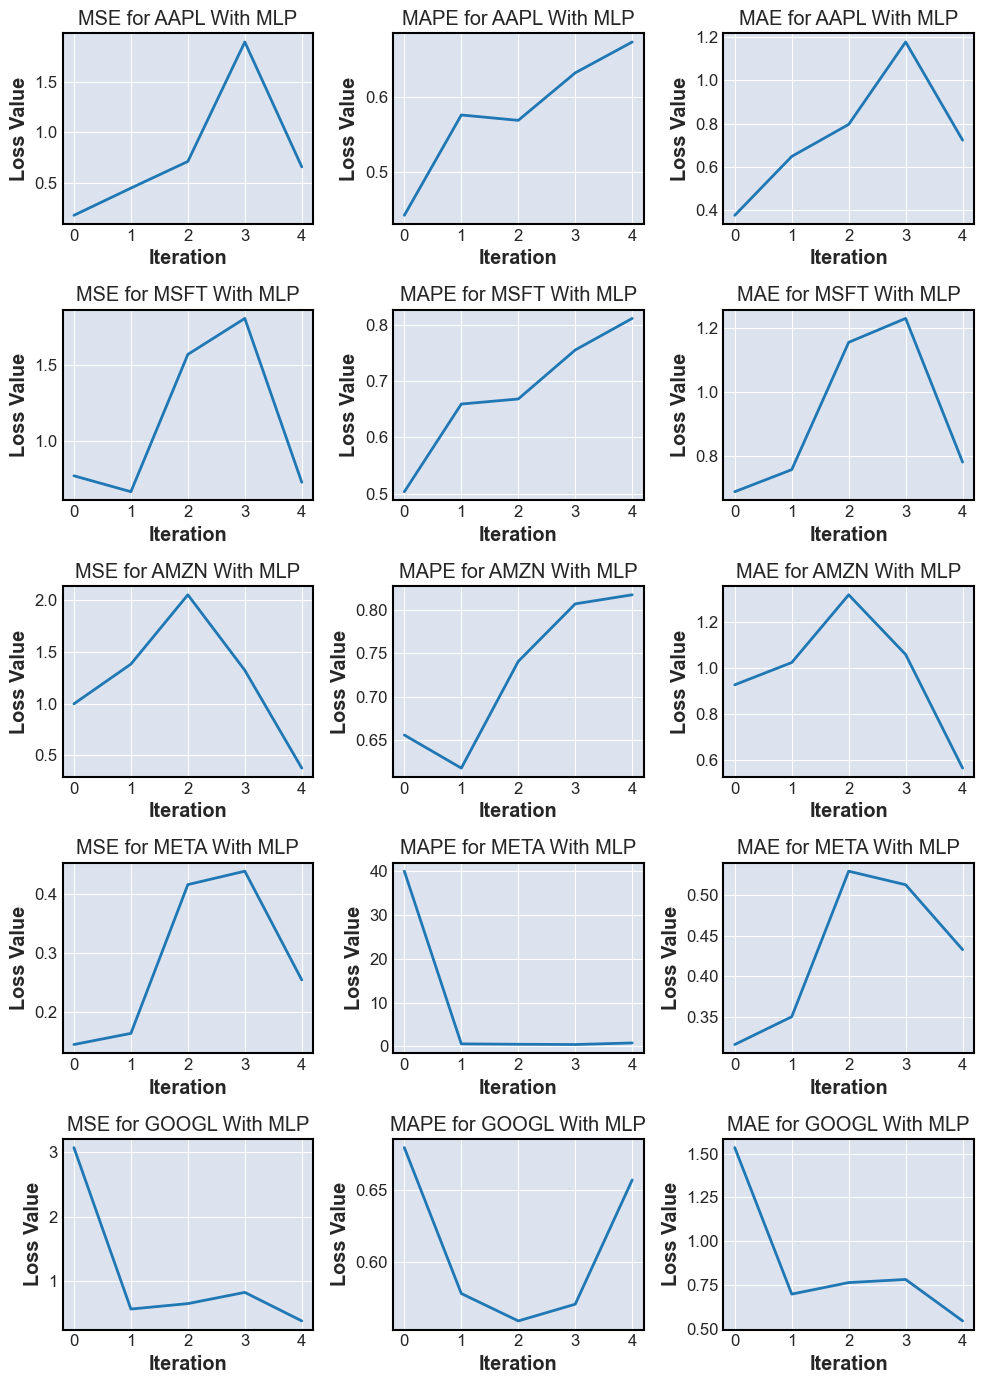

In [46]:

model = MLP(10,1)
result = train_model(close_values,model,normalize=True)
plot_losses(result,"MLP")

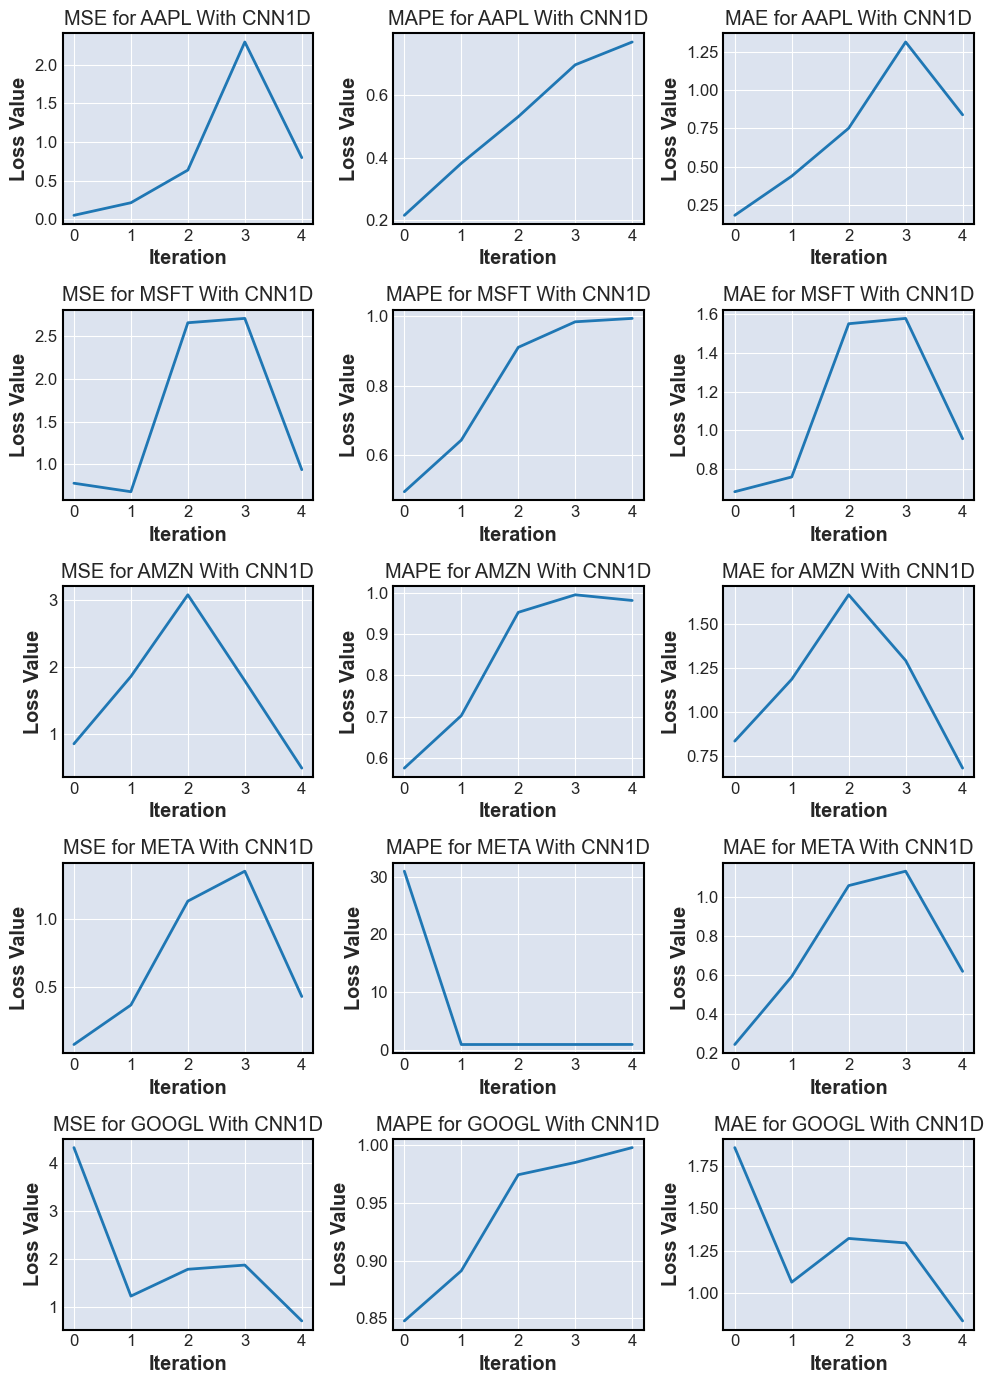

In [47]:

model = CNN1D(10,1,1)
result = train_model(close_values,model,normalize=True)
plot_losses(result,"CNN1D")

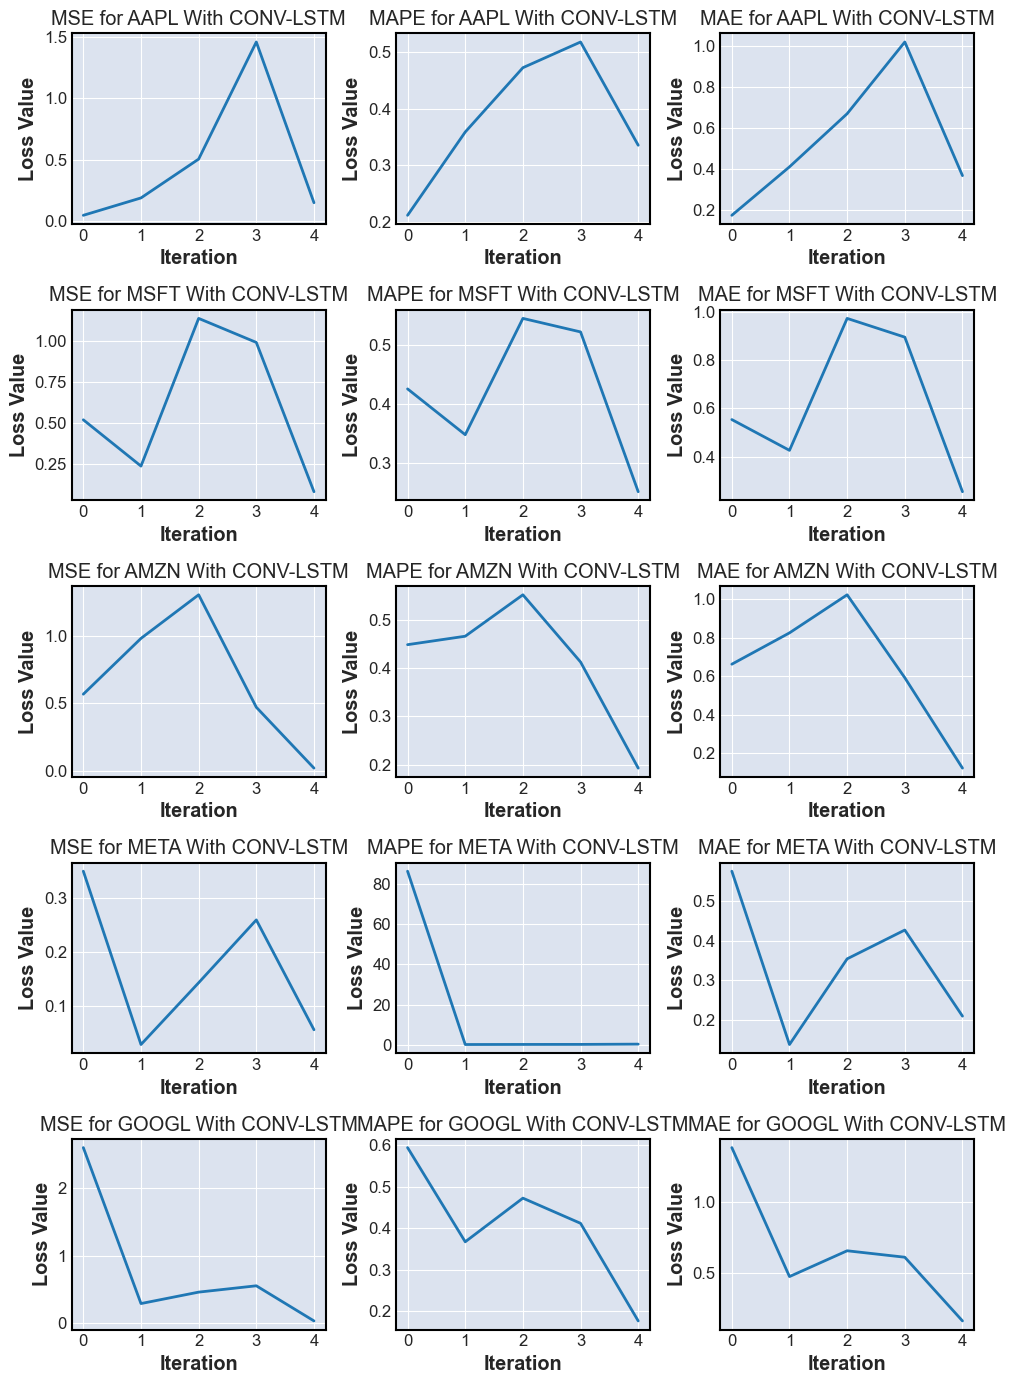

In [48]:

model = ConvLSTM(10,1,1)
result = train_model(close_values,model,normalize=True)
plot_losses(result,"CONV-LSTM")

# Section 6

In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit

def naive_forecast(train_data, test_data):
    prediction = train_data[-1]
    return np.full_like(test_data, prediction)

def naive_model(data, normalize=False):
    tss = TimeSeriesSplit(n_splits=5)
    results = {}
    x_data, y_data = get_data(data, window_size=10)

    for ticker_index, ticker_name in enumerate(["AAPL", "MSFT", "AMZN", "META", "GOOGL"]):
        loss_results = {'MSE': [], 'MAPE': [], 'MAE': []}

        if len(y_data[ticker_index]) != len(x_data[ticker_index]):
            raise KeyError

        for j, (train_index, test_index) in enumerate(tss.split(x_data[ticker_index])):
            x_train = x_data[ticker_index][train_index]
            x_test = x_data[ticker_index][test_index]

            y_train = y_data[ticker_index][train_index]
            y_test = y_data[ticker_index][test_index]

            if normalize:
                scaler = MinMaxScaler()
                normalized_train_data = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
                normalized_test_data = scaler.transform(y_test.reshape(-1, 1)).flatten()
                y_train = normalized_train_data
                y_test = normalized_test_data

            forecast_values = naive_forecast(y_train, y_test)

            mse = mean_squared_error(y_test, forecast_values)
            mae = mean_absolute_error(y_test, forecast_values)
            mape = mean_absolute_percentage_error(y_test, forecast_values)

            loss_results['MSE'].append(mse)
            loss_results['MAE'].append(mae)
            loss_results['MAPE'].append(mape)
            results[ticker_name] = loss_results
    return results


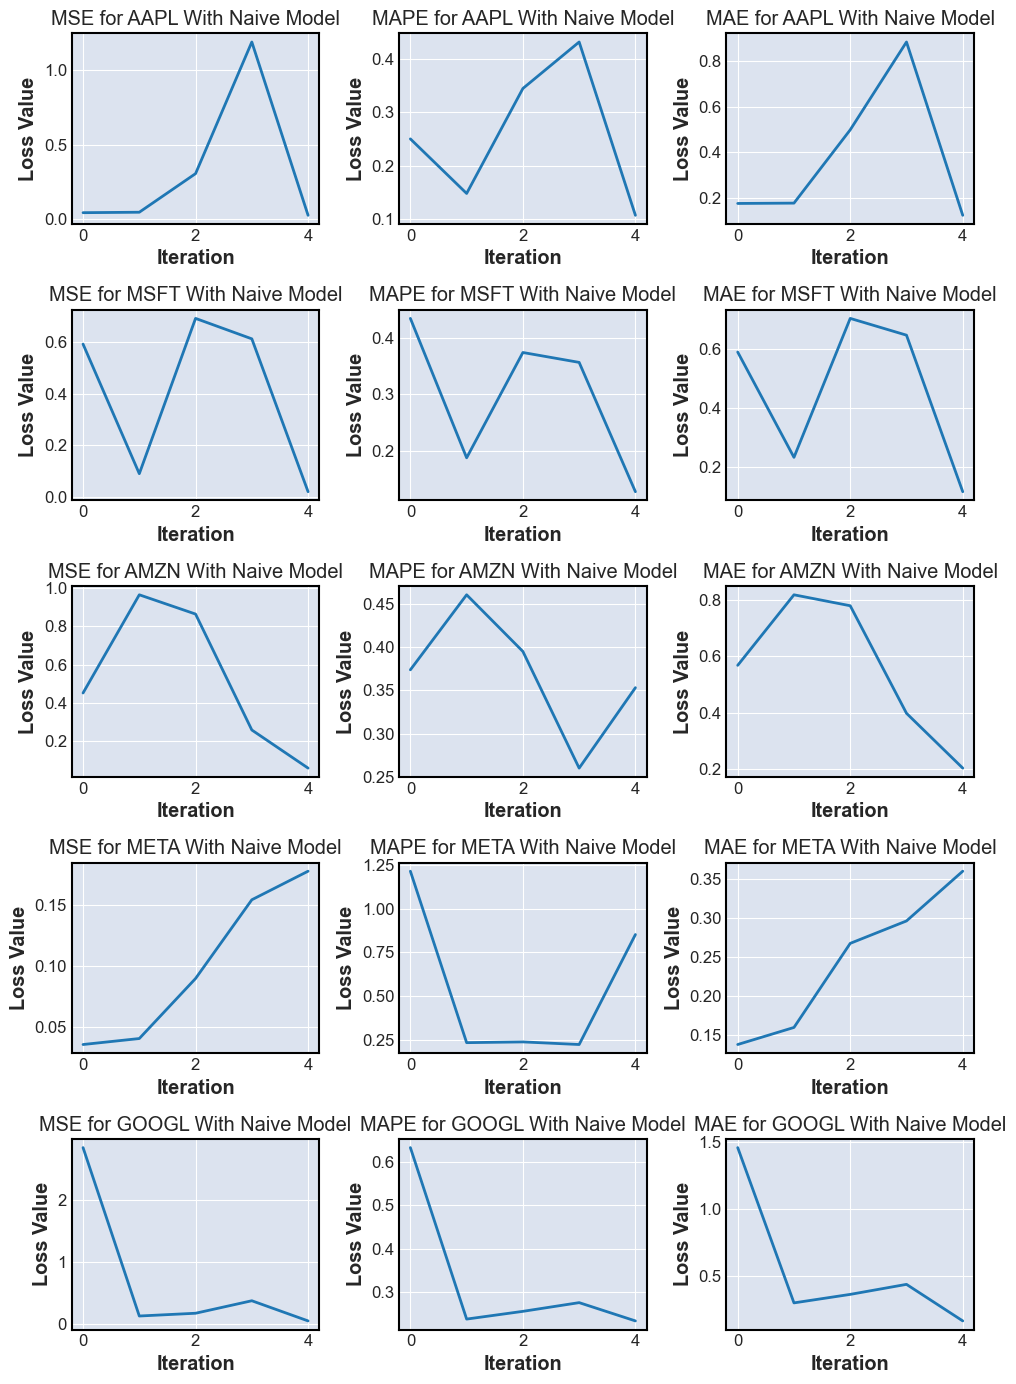

In [50]:
result = naive_model(close_values,normalize=True)
plot_losses(result,"Naive Model")